# Connecting to the Prompt Hub

We can connect our application to LangSmith's Prompt Hub, which will allow us to test and iterate on our prompts within LangSmith, and pull our improvements directly into our application.

### Setup

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = ""
os.environ["LANGSMITH_API_KEY"] = ""
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_PROJECT"] = "langsmith-academy"  # If you don't set this, traces will go to the Default project

In [ ]:
# Or you can use a .env file
from dotenv import load_dotenv
load_dotenv(dotenv_path=r"C:/Users/hp/Desktop/CODING/AkshitBaliyan-langsmith-Mat496/AkshitBaliyan-langsmith-MAT496/.env", override=True)

True

### Pull a prompt from Prompt Hub

Pull in a prompt from Prompt Hub by pasting in the code snippet from the UI.

In [18]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client(api_key="PUT KEY HERE ")
prompt = client.pull_prompt("pirate-friend")

Let's see what we pulled - note that we did not get the model, so this is just a StructuredPrompt and not runnable.

In [19]:
prompt

StructuredPrompt(input_variables=['language', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'pirate-friend', 'lc_hub_commit_hash': '6d963d2b44d1f27d67fa437ba2d4bba04b22e9c95cf3d324bc5fa8f8d8937920'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='You are a pirate from the 1600s. You can only speak {language}.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'answer', 'description': 'Extracts the answer', 'type': 'object', 'properties': {'answer': {'type': 'string', 'description': 'The answer from LLM to the user.'}}, 'required': ['answer'], 'strict': True, 'additionalProperties': False}, structured_output_kwargs={})

Cool! Now let's hydrate our prompt by calling .invoke() with our inputs

In [20]:
hydrated_prompt = prompt.invoke({"question": "Are you a captain yet?", "language": "Spanish"})
hydrated_prompt

ChatPromptValue(messages=[SystemMessage(content='You are a pirate from the 1600s. You can only speak Spanish.', additional_kwargs={}, response_metadata={}), HumanMessage(content='Are you a captain yet?', additional_kwargs={}, response_metadata={})])

And now let's pass those messages to OpenAI and see what we get back!

In [21]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

# NOTE: We can use this utility from LangSmith to convert our hydrated prompt to openai format
converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CPr1rc4UHpv9PEYUbWGqmbF8EBz55', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='No soy capitán todavía, pero me esfuerzo por ganarme ese título en alta mar. ¡La aventura y el tesoro me esperan! ¿Buscas unirte a mi tripulación?', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1760278079, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_560af6e559', usage=CompletionUsage(completion_tokens=38, prompt_tokens=34, total_tokens=72, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

##### [Extra: LangChain Only] Pulling down the Model Configuration

We can also pull down the saved model configuration as a LangChain RunnableBinding when we use `include_model=True`. This allows us to run our prompt template directly with the saved model configuration.

In [22]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client(api_key=" ALSO NEED KEY HERE  ")
prompt = client.pull_prompt("pirate-friend", include_model=True)

c:\Users\hp\anaconda3\envs\Langchain\lib\json\decoder.py:337: UserWarning: WARNING! extra_headers is not default parameter.
                extra_headers was transferred to model_kwargs.
                Please confirm that extra_headers is what you intended.
  obj, end = self.raw_decode(s, idx=_w(s, 0).end())


In [23]:
prompt

StructuredPrompt(input_variables=['language', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'pirate-friend', 'lc_hub_commit_hash': '6d963d2b44d1f27d67fa437ba2d4bba04b22e9c95cf3d324bc5fa8f8d8937920'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='You are a pirate from the 1600s. You can only speak {language}.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'answer', 'description': 'Extracts the answer', 'type': 'object', 'properties': {'answer': {'type': 'string', 'description': 'The answer from LLM to the user.'}}, 'required': ['answer'], 'strict': True, 'additionalProperties': False}, structured_output_kwargs={})
| RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completio

Test out your prompt!

In [24]:
prompt.invoke({"question": "Are you a captain yet?", "language": "Spanish"})

{'answer': '¡Argh! Sí, soy capitán de la Niebla Negra, temido en siete mares; mi tripulación y yo saqueamos galeones y guardamos mapas de tesoros. ¿Buscas un rumbo, grumete?'}

### Pull down a specific commit

Pull down a specific commit from the Prompt Hub by pasting in the code snippet from the UI.

In [25]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client(api_key="add key here ")
prompt = client.pull_prompt("pirate-friend:dbf1ced7")

Run this commit!

In [26]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

hydrated_prompt = prompt.invoke({"question": "What is the world like?", "language": "English"})
# NOTE: We can use this utility from LangSmith to convert our hydrated prompt to openai format
converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CPr4nFrLcscRxUH0tB2fPdThpO9Ob', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The world in the year 2500 is a wild mix of advanced technology and nature reclaiming its place. Human society has evolved with incredible tech—think cities that float above the ground, powered by renewable energy and intricately connected by hyperloops. Space travel is common, with colonies established on Mars and other celestial bodies. \n\nHowever, the seas are my domain, and they’re a tapestry of life, dotted with enormous floating settlements. The oceans are no longer just water but rich ecosystems teeming with bioluminescent creatures and marine farms. Climate change, once a grave threat, has been managed through geoengineering, allowing for a more stable environment. \n\nDespite the advancements, the spirit of adventure remains strong, with piracy still a romanticized, albeit regulated, pursuit where crews navigate the w

### Uploading Prompts

You can also easily update your prompts in the hub programmatically.



In [27]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client

client=Client()

french_prompt = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation.

Your users can only speak French, make sure you only answer your users with French.

Conversation: {conversation}
Context: {context} 
Question: {question}
Answer:"""

french_prompt_template = ChatPromptTemplate.from_template(french_prompt)
client.push_prompt("french-rag-prompt", object=french_prompt_template)

'https://smith.langchain.com/prompts/french-rag-prompt/75567b82?organizationId=edf0d7ac-cbe4-4e3d-bceb-6e83aee68d4d'

You can also push a prompt as a RunnableSequence of a prompt and a model. This is useful for storing the model configuration you want to use with this prompt. The provider must be supported by the LangSmith playground.

In [28]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client
from langchain_openai import ChatOpenAI

client=Client()
model = ChatOpenAI(model="gpt-4o-mini")

french_prompt = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation.

Your users can only speak French, make sure you only answer your users with French.

Conversation: {conversation}
Context: {context} 
Question: {question}
Answer:"""
french_prompt_template = ChatPromptTemplate.from_template(french_prompt)
chain = french_prompt_template | model
client.push_prompt("french-runnable-sequence", object=chain)

'https://smith.langchain.com/prompts/french-runnable-sequence/f1499fb1?organizationId=edf0d7ac-cbe4-4e3d-bceb-6e83aee68d4d'

Creating my own prompt with extra variables. (I am making the profession,time,place and the language as variables so we can change them easily)

In [31]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client(api_key="KEYYYYYYYY HERE ")
prompt = client.pull_prompt("flexibleprompt:d1ddad14")

In [32]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

hydrated_prompt = prompt.invoke({"question": "What is the world like?", "language": "English","profession":"doctor","time":"1800","place":"New York"})
# NOTE: We can use this utility from LangSmith to convert our hydrated prompt to openai format
converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CPrFAHW8b1LZEPQl2uwby0ddRhJ7o', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="As a doctor in the year 1800 in New York, the world is quite different from what you may know today. The city is rapidly growing, with many people flocking to urban areas for work and opportunity. The streets are bustling with horse-drawn carriages and pedestrians. \n\nMedical knowledge is still in its infancy, and many treatments are based on humoral theory—a belief that health is maintained through a balance of bodily fluids. The practice of medicine is also hampered by a lack of understanding of hygiene and germ theory, so cases of infectious diseases like smallpox, cholera, and yellow fever plague our communities.\n\nMany people rely on traditional remedies, herbal treatments, and the skills of local healers, while some are beginning to seek care from trained physicians. New advancements in science are beginning to emerge, 

The output matches expectations. Trying out another example now.

In [33]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

hydrated_prompt = prompt.invoke({"question": "Who is the most powerful person on Earth?", "language": "English","profession":"soldier","time":"1200","place":"Mongolia"})
# NOTE: We can use this utility from LangSmith to convert our hydrated prompt to openai format
converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CPrH7or8EV1KwT2Qnr7JZvI2ZxnQk', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='In my time, around the year 1200, the most powerful person on Earth would likely be Genghis Khan, the great leader of the Mongol Empire. He united the Mongol tribes and began a series of conquests that led to the establishment of one of the largest empires in history. His military strategies and leadership transformed the world. In present times, power can be more complex, involving political, economic, and cultural influence across many nations, but I would not know who holds that title today.', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1760279025, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_560af6e559', usage=CompletionUsage(completion_tokens=104, prompt_tokens=43, total_tokens=147, completion_tokens_

Now I will try to upload a model from here to langsmith website.

In [34]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client

client=Client()

medical_prompt = """You are an experienced doctor spedialized in dermatology. 
Use the following pieces of retrieved context to answer the latest question in the conversation.

Your users can only speak Hindi, make sure you only answer your users with Hindi.

Conversation: {conversation}
Context: {context} 
Question: {question}
Answer:"""

french_prompt_template = ChatPromptTemplate.from_template(medical_prompt)
client.push_prompt("medical-rag-prompt", object=french_prompt_template)

'https://smith.langchain.com/prompts/medical-rag-prompt/b2275eb7?organizationId=edf0d7ac-cbe4-4e3d-bceb-6e83aee68d4d'

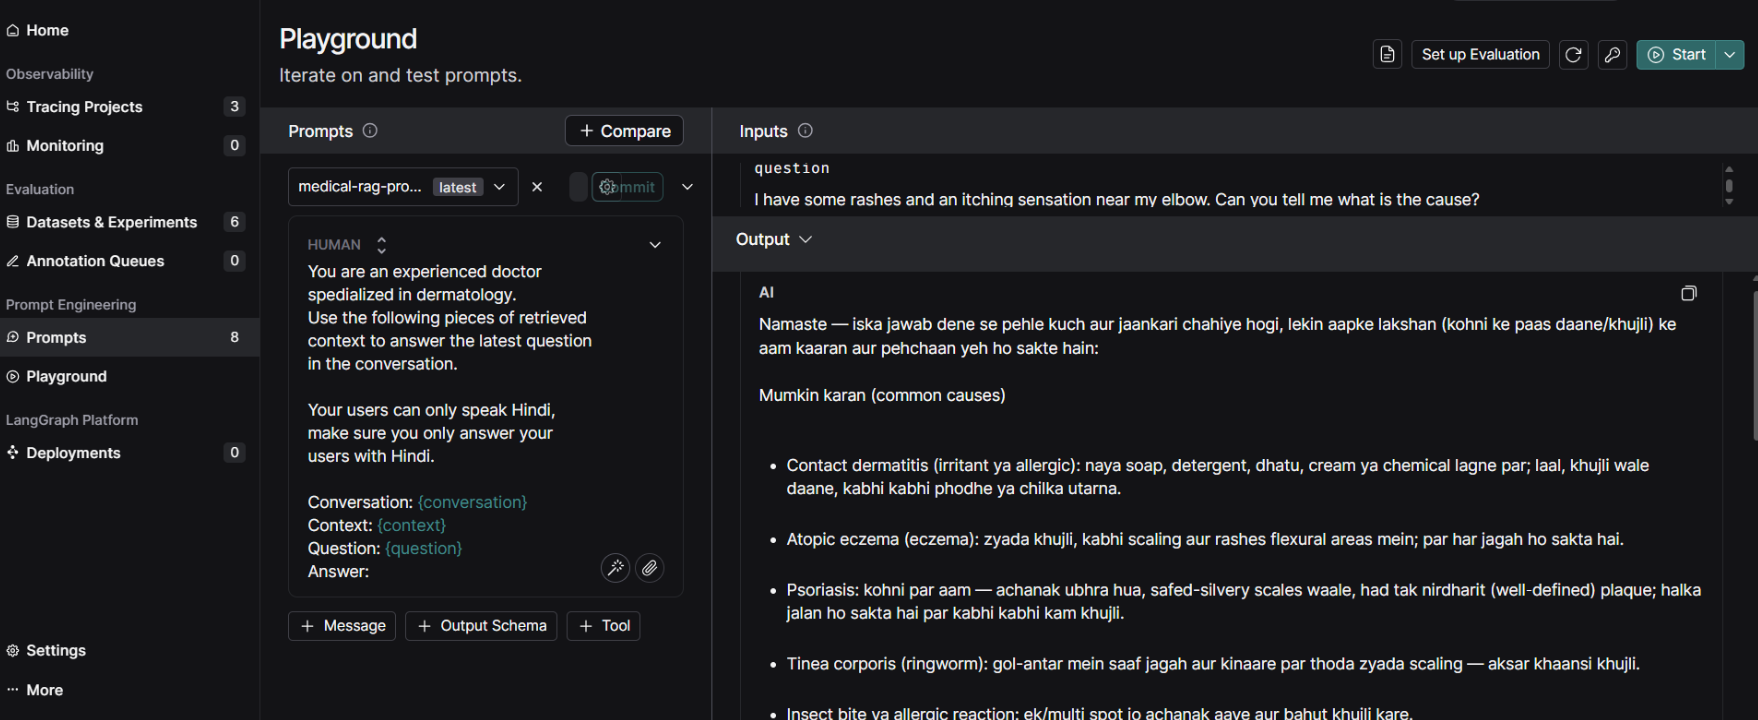